In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


You can use your own notes and any class materials posted eClass, including Jupyter notebooks and anything else posted in eClass.

You cannot use any external internet sources (e.g., Google, Wikipedia, StackExchange, etc).

You must work alone for this exam.

Consider the function 
$$ f(x) = \begin{cases}
\frac{\log(1 + x)}{x}, & x \neq 0 \\\\
1, & x = 0
\end{cases}$$
## A
Create a Python function that returns $f(x)$ for input $x$. The function should be evaluated exactly as shown

    def f(x):
        if x == 0:
            return 1.
        else:
            return log(1 + x)/x
In other words, cut and paste the above code into your notebook.
## B
Generate an array `x` of 100 equally spaced points in $[-0.5, 1]$. Add the value $10^{-15}$ to each value in `x` and evaluate the function at the points in `x`. Plot the result.

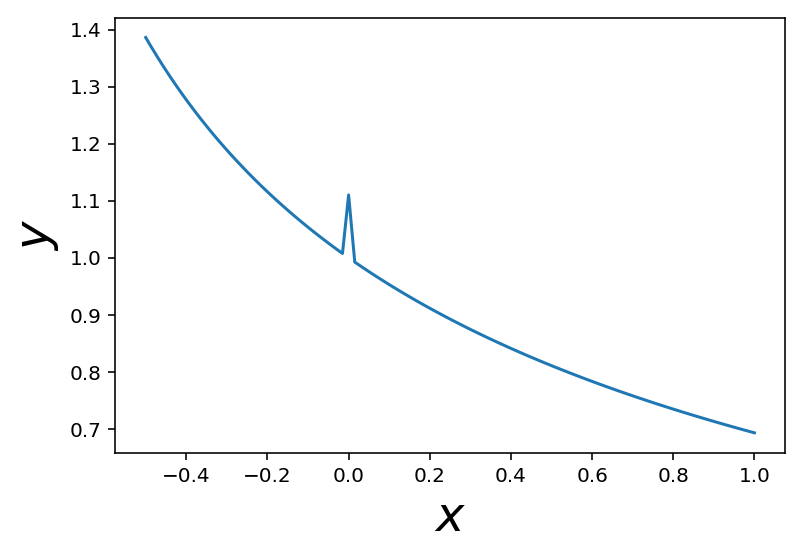

In [4]:
def f(x):
    if x == 0:
        return 1.
    else:
        return log(1 + x)/x

x = linspace(-0.5, 1, 100) + 1e-15
y = array([f(xi) for xi in x])
plot(x, y)
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);

## C
Generate 100 equally spaced points in $x \in [-10^{-15}, 10^{-15}]$ and plot the function $f(x)$. What is the maximum magnitude of the error in the function values for $x$ in this range?

max error: 1.0


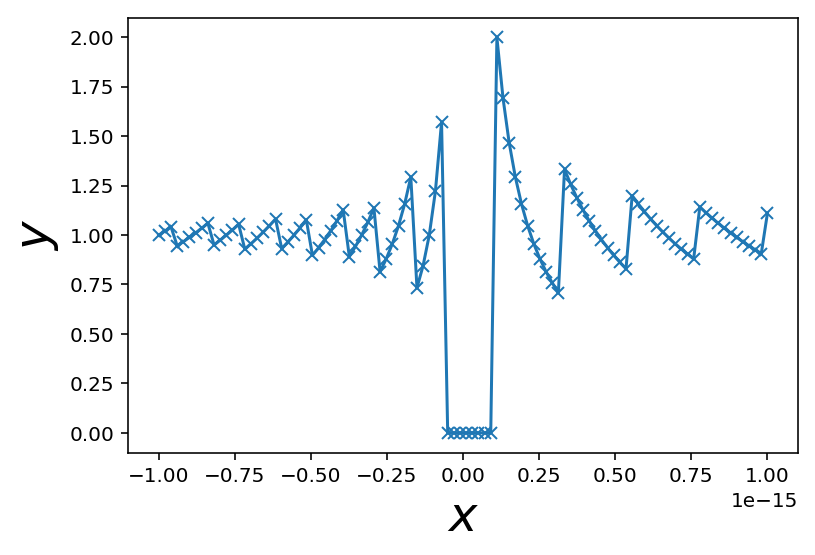

In [5]:
x = linspace(-1e-15, 1e-15, 100)
y = array([f(xi) for xi in x])
plot(x, y, '-x')
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);
print('max error:', absolute(1-y).max())

### You should notice rounding error in the numerical evaluation of the function $f$.

## D
Implement the following alternative version of the function.

    def f2(x):
        q = 1. + x
        if q == 1.:
            return 1.
        else:
            return log(q)/(q - 1.)

Repeat part B and C using the new function. 

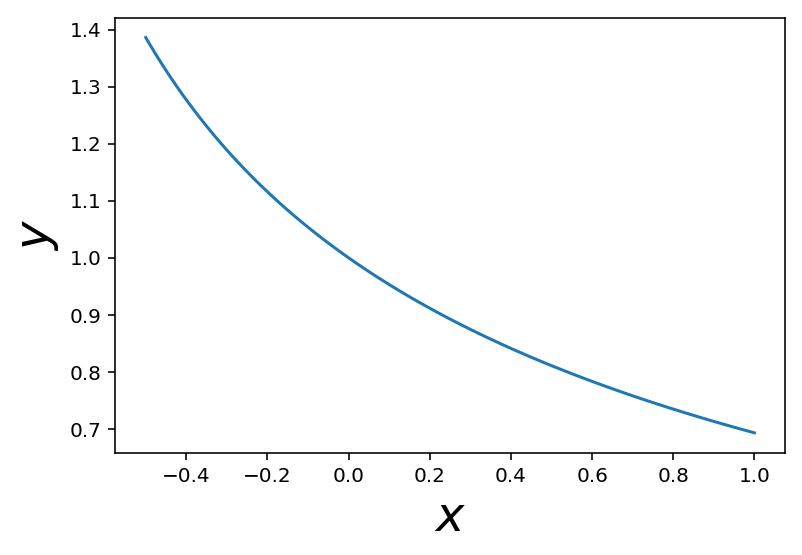

In [7]:
def f2(x):
    d = 1. + x
    if d == 1.:
        return 1.
    else:
        return log(d)/(d-1.)

x = linspace(-0.5, 1, 100) + 1e-15
y = array([f2(xi) for xi in x])
plot(x, y)
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);

max error: 6.661338147750939e-16


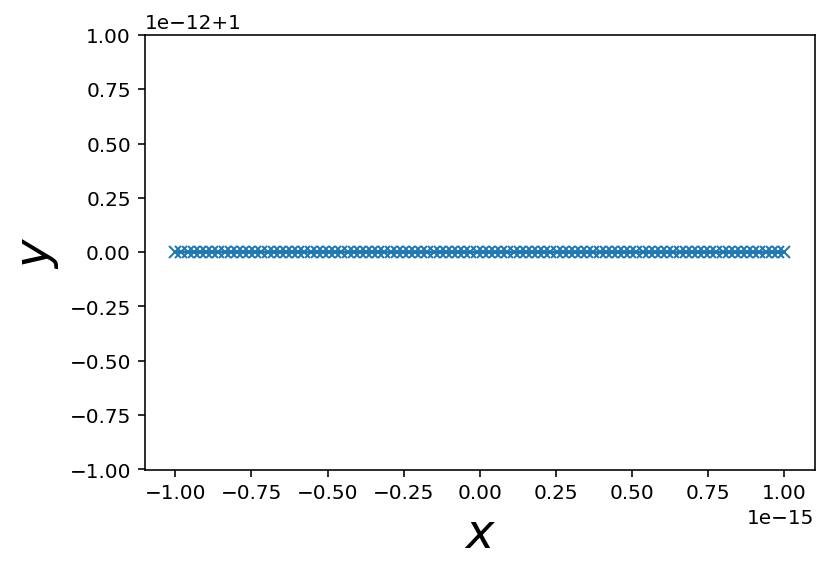

In [8]:
x = linspace(-1e-15, 1e-15, 100)
y = array([f2(xi) for xi in x])
plot(x, y, '-x')
xlabel(r'$x$', fontsize=24)
ylabel(r'$y$', fontsize=24);
print('max error:', absolute(1-y).max())

### You should notice that the mysterious roundoff error has vanished.

We will explain the difference in the behavior of each function for $x$ near zero. In the following, we will treat $0<\epsilon \ll 1$ as a small parameter representing machine precision. Suppose that we model the effect of roundoff error in the common arithmetic operations with the following. Let the floating point addition operation be given by
$$ x \oplus y = (x + y)(1 + a\epsilon),$$
where $a$ is an unknown rounding magnitude with $\vert a \vert \leq 1$. Think of this as a function 
$$ x \oplus y = {\rm floatadd}(x, y) = (x + y)(1 + a\epsilon).$$
Notice that the relative error is
$$ \frac{\vert x \oplus y - (x+y)\vert}{\vert x+y \vert} = \vert a \vert \epsilon \leq \epsilon.$$

Likewise, define the other floating point arithmetic operations with
\begin{align}
 x \ominus y &= (x - y)(1 + s\epsilon), \quad \vert s \vert \leq 1, \\
 x \odot y &= (x \cdot y)(1 + m\epsilon), \quad \vert m \vert \leq 1, \\
x \oslash y &= (x / y)(1 + d\epsilon), \quad \vert d \vert \leq 1.
\end{align}
Since our function uses the $\log$ function, assume that we have a numerical implementation of the natural logarithm $\widehat{\log}$ such that
$$ \widehat{\log}(x) = \log(x)(1 + l\epsilon), \quad \vert l \vert \leq 1. $$

Our goal will be to examine the rounding error from the two functions for small values of $x$. We will let $x = z \epsilon$ and think of $z$ as a number that is fixed as $\epsilon \to 0^+$. 

# A disclamer must be made here 
The constants $a, s, m, d, l$ all depend on $x$, and they are not continuous functions of $x$. This is clearly seen in the figure from part C. In the analysis, we eventually assume enough smoothness to compute a Taylor series, which is not strictly justified. However, this approach should allow us to determine the limiting behavior in the limit $\epsilon \to 0$ and $x \to 0$ with $x = \epsilon z$.

## E
With $x = z\epsilon$, expand 
$$\hat{f}(x) = \widehat{\log}(x \oplus 1) \oslash x$$ 
in powers of $\epsilon$ (using a Taylor series around $\epsilon = 0$ as necessary) and find the leading order asymptotic behavior of the error $\mathcal{E} = \vert \hat{f}(z\epsilon) - 1\vert$.

---------------------------------------
### Solution:
We will make use of the Taylor expansion $\log(1 + u) = u - \frac{u^2}{2} + O(u^3)$.
Using $x = \epsilon z$, we have
\begin{align}
\hat{f}(x) &= \widehat{\log}(x \oplus 1) \oslash x \\
&= \frac{1}{x}\log((1+x)(1+\epsilon a))(1 + \epsilon l)(1 + \epsilon d) \\
&= \frac{1}{\epsilon z}\left(\log(1 + \epsilon z) + \log(1+\epsilon a)\right)(1 + \epsilon l)(1 + \epsilon d) \\
& = \frac{1}{\epsilon z}\left(\epsilon(z + a) + O(\epsilon^2)\right)(1 + O(\epsilon)) \\
& = \frac{1}{z}\left((z + a) + O(\epsilon)\right)(1 + O(\epsilon)) \\
& = 1 + \frac{a}{z} + O(\epsilon).
\end{align}
The error is therefore
$$\mathcal{E} = \vert \hat{f}(z\epsilon) - 1\vert = \left \vert \frac{a}{z}\right \vert + O(\epsilon).$$

## F
With $x = z\epsilon$, expand 
$$
\hat{f}_2(x) = \widehat{\log}(q) \oslash (q \ominus 1), \quad q = x \oplus 1
$$ 
in powers of $\epsilon$ (using a Taylor series around $\epsilon = 0$ as necessary) and find the leading order asymptotic behavior of the error $\mathcal{E}_2 = \vert \hat{f}_2(z\epsilon) - 1\vert$.

---------------------------------------
### Solution:
We will make use of the Taylor expansion $\log(1 + u) = u - \frac{u^2}{2} + O(u^3)$.
Using $x = \epsilon z$, we have
\begin{align}
\hat{f}(x) &= \widehat{\log}(x \oplus 1) \oslash x \\
&= \frac{\log((1+x)(1+\epsilon a))(1 + \epsilon l)}{\left((1+x)(1+\epsilon a) - 1\right)(1 + \epsilon s)}(1 + \epsilon d) \\
&= \frac{\left(\log(1+\epsilon z) + \log(1+\epsilon a)\right)(1 + \epsilon l)}{\left((1 + \epsilon z)(1+\epsilon a) - 1\right)(1 + \epsilon s)}(1 + \epsilon d) \\
&= \frac{\left(\epsilon (z + a)  + O(\epsilon^2)\right)(1 + \epsilon l)}{\left((1 + \epsilon z)(1+\epsilon a) - 1\right)(1 + \epsilon s)}(1 + \epsilon d) \\
&= \frac{\left(\epsilon (z + a)  + O(\epsilon^2)\right)(1 + \epsilon l)}{\left(\epsilon (z + a) + O(\epsilon^2)\right)(1 + \epsilon s)}(1 + \epsilon d) \\
&= \frac{\left(1  + O(\epsilon)\right)(1 + \epsilon l)(1 + \epsilon d)}{\left(1 + O(\epsilon)\right)(1 + \epsilon s)} \\
&= 1 + O(\epsilon).
\end{align}




The error is therefore
$$\mathcal{E}_2 = \vert \hat{f}_2(z\epsilon) - 1\vert = O(\epsilon).$$

## G
Demonstrate that you understand the result by commenting, with a few sentences, on your results from part E and F.

---------------------------------------
### Solution:

When we take the limit $\epsilon \to 0$ and $x \to 0$ with $x = \epsilon z$, the error in the first approximation does not vanish as it should, in fact we are left with an $O(1)$ error with magnitude $a/z$. The second algorithm for computing the function correlates the error in the numerator and denominator in such a way that the rounding errors cancel out, leaving an error that vanishes like $O(\epsilon)$ in the limit.